In [2]:
import pandas as pd
from datetime import datetime

# Load dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Drop rows with missing income values
df_cleaned = df.dropna(subset=['Income'])

# Convert 'Dt_Customer' to datetime
df_cleaned['Dt_Customer'] = pd.to_datetime(df_cleaned['Dt_Customer'], format='%d-%m-%Y')

# Create new features
current_year = datetime.now().year
df_cleaned['Age'] = current_year - df_cleaned['Year_Birth']
df_cleaned['Customer_Tenure'] = (datetime.now() - df_cleaned['Dt_Customer']).dt.days

# Drop unnecessary columns for clustering
columns_to_drop = ['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']
df_prepped = df_cleaned.drop(columns=columns_to_drop)

# Display updated info and preview
df_prepped.info(), df_prepped.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

C:\Users\sedan\AppData\Local\Temp\ipykernel_9616\1632733341.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Dt_Customer'] = pd.to_datetime(df_cleaned['Dt_Customer'], format='%d-%m-%Y')
C:\Users\sedan\AppData\Local\Temp\ipykernel_9616\1632733341.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'] = current_year - df_cleaned['Year_Birth']
C:\Users\sedan\AppData\Local\Temp\ipykernel_9616\1632733341.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

(None,
     Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
 0  Graduation         Single  58138.0        0         0       58       635   
 1  Graduation         Single  46344.0        1         1       38        11   
 2  Graduation       Together  71613.0        0         0       26       426   
 3  Graduation       Together  26646.0        1         0       26        11   
 4         PhD        Married  58293.0        1         0       94       173   
 
    MntFruits  MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  \
 0         88              546              172  ...                  7   
 1          1                6                2  ...                  5   
 2         49              127              111  ...                  4   
 3          4               20               10  ...                  6   
 4         43              118               46  ...                  5   
 
    AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1 

In [3]:
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_prepped, columns=['Education', 'Marital_Status'], drop_first=True)

# Separate features and scale
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# Show scaled feature sample
df_scaled.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,...,0.992806,-0.444062,-0.526530,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
1,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,...,0.992806,-0.444062,-0.526530,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
2,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,...,0.992806,-0.444062,-0.526530,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,...,0.992806,-0.444062,-0.526530,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
4,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,...,-1.007246,-0.444062,1.899228,-0.036819,-0.341958,1.259271,-0.519533,-0.590553,-0.188452,-0.030056


C:\Users\sedan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sedan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sedan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sedan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

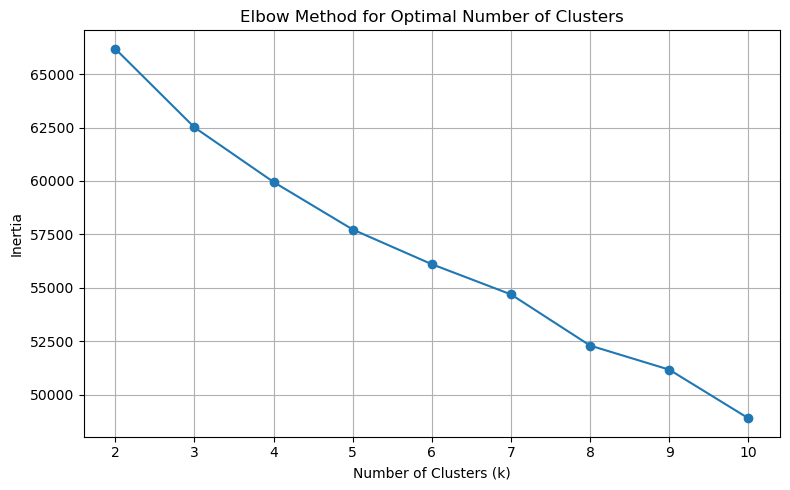

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method to find optimal number of clusters
inertia = []
k_range = range(2, 11)  # Try between 2 and 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
# Apply KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Add cluster labels back to the original dataframe
df_prepped_with_clusters = df_prepped.copy()
df_prepped_with_clusters['Cluster'] = cluster_labels

# View summary statistics for each cluster
cluster_summary = df_prepped_with_clusters.groupby('Cluster').mean().round(2)


C:\Users\sedan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sedan\AppData\Local\Temp\ipykernel_9616\158523557.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df_prepped_with_clusters.groupby('Cluster').mean().round(2)


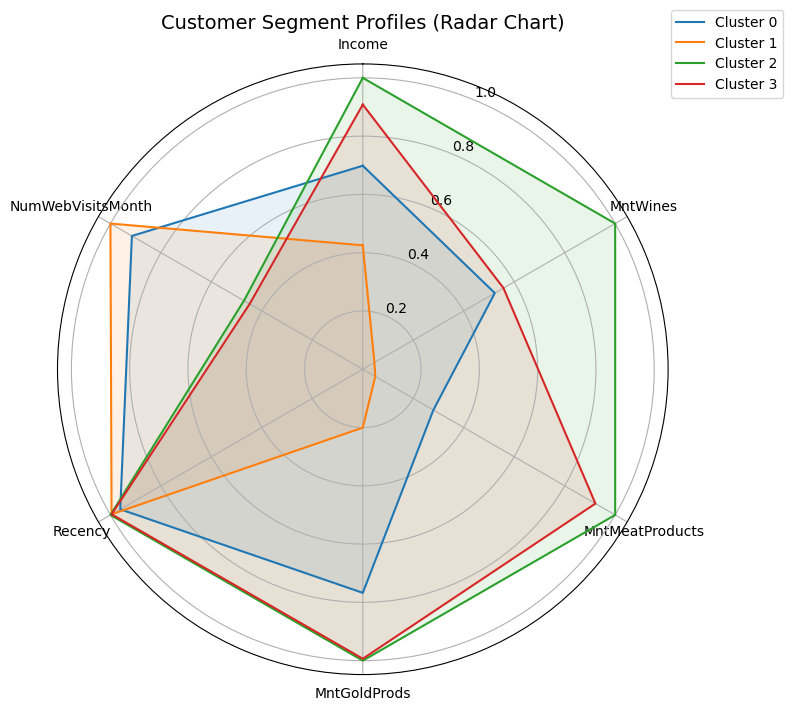

In [7]:
import matplotlib.pyplot as plt

# Select features to visualize
features_to_plot = ['Income', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'Recency', 'NumWebVisitsMonth']

# Normalize the values for radar chart
cluster_data = df_prepped_with_clusters.groupby('Cluster')[features_to_plot].mean()
cluster_data_normalized = cluster_data.copy()
for col in features_to_plot:
    max_val = cluster_data[col].max()
    cluster_data_normalized[col] = cluster_data[col] / max_val  # normalize to 0-1

# Prepare radar chart setup
labels = features_to_plot
num_vars = len(labels)

angles = [n / float(num_vars) * 2 * 3.14159 for n in range(num_vars)]
angles += angles[:1]  # repeat the first to close the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each cluster
for i, row in cluster_data_normalized.iterrows():
    values = row.tolist()
    values += values[:1]  # repeat the first value
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

# Add labels and styling
ax.set_theta_offset(3.14159 / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids([a * 180 / 3.14159 for a in angles[:-1]], labels)
plt.title('Customer Segment Profiles (Radar Chart)', size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


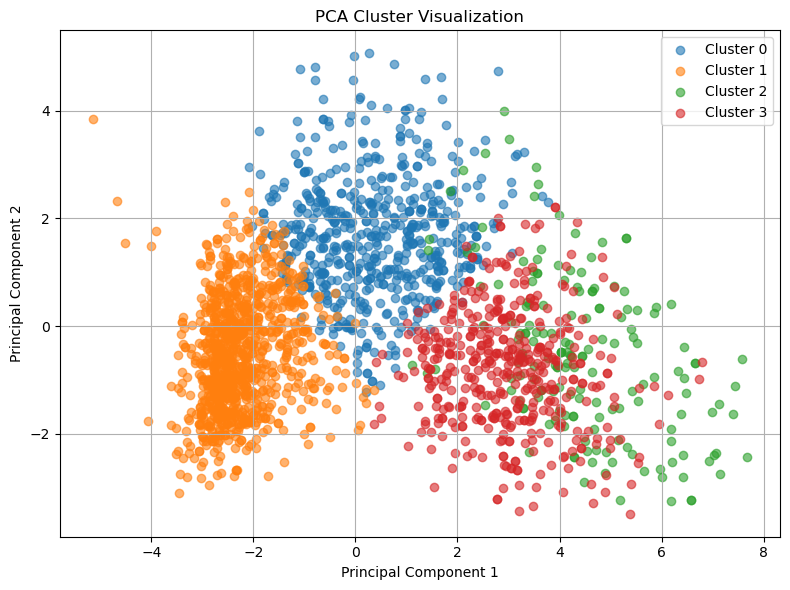

In [8]:
from sklearn.decomposition import PCA

# Run PCA on scaled data
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Add cluster labels for coloring
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels

# Plot the PCA scatterplot
plt.figure(figsize=(8, 6))
for cluster in sorted(pca_df['Cluster'].unique()):
    cluster_points = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_points['PCA1'], cluster_points['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('PCA Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
